<a href="https://colab.research.google.com/github/ds4geo/ds4geo/blob/master/WS%202020%20Course%20Notes/Satellite_Geology_supplement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install geopandas

     |████████████████████████████████| 972kB 7.2MB/s 
     |████████████████████████████████| 14.8MB 286kB/s 
     |████████████████████████████████| 6.5MB 27.2MB/s 


In [3]:
!pip install rasterio
!pip install rasterstats

     |████████████████████████████████| 18.3MB 254kB/s 
     |████████████████████████████████| 133kB 7.3MB/s 


In [4]:
import geopandas as gpd
import rasterio as rio
import rasterstats

# Investigating Iran geological map

In [5]:
# Download and unzip data
!wget https://certmapper.cr.usgs.gov/data/we/ofr97470g/spatial/shape/geo2cg.zip
!unzip geo2cg.zip
# legend: https://certmapper.cr.usgs.gov/server/rest/services/geology/iran/MapServer/legend

--2020-12-16 14:55:04--  https://certmapper.cr.usgs.gov/data/we/ofr97470g/spatial/shape/geo2cg.zip
Resolving certmapper.cr.usgs.gov (certmapper.cr.usgs.gov)... 137.227.229.75, 2001:49c8:8000:121d::1075
Connecting to certmapper.cr.usgs.gov (certmapper.cr.usgs.gov)|137.227.229.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7367988 (7.0M) [application/zip]
Saving to: ‘geo2cg.zip’

geo2cg.zip          100%[===================>]   7.03M  15.0MB/s    in 0.5s    

2020-12-16 14:55:05 (15.0 MB/s) - ‘geo2cg.zip’ saved [7367988/7367988]

Archive:  geo2cg.zip
  inflating: geo2cg.shp              
  inflating: geo2cg.prj              
  inflating: geo2cg.dbf              
  inflating: geo2cg.shp.xml          
  inflating: geo2cg.shx              


In [6]:
# Read the data
dat = gpd.read_file("geo2cg.shp")

In [7]:
dat.head()

,AREA,PERIMETER,GEO2CG_,GEO2CG_ID,GLG,GLG_STA,geometry
0,48.389,63.821,2,1,U,46,"POLYGON ((44.58779 39.78806, 44.57898 39.77580..."
1,14.497,22.126,3,2,SEA,36,"POLYGON ((53.38628 40.00573, 53.42324 40.00316..."
2,0.042,1.718,4,15000,U,1,"POLYGON ((53.38628 40.00573, 53.36918 39.99938..."
3,0.007,0.419,5,4,U,46,"POLYGON ((52.95016 39.84906, 52.96278 39.84292..."
4,0.022,0.984,6,5,Q,30,"POLYGON ((44.58779 39.78806, 44.59237 39.79226..."


In [8]:
# Human readable names
name_dict = {'C': 'Carboniferous',
 'CD': 'Carboniferous-Devonian',
 'Cm': 'Cambrian',
 'CmpCm': 'Cambrian-Precambrian',
 'CzMzi': 'Cenozoic-Mesozoic Intrusives',
 'CzMzv': 'Mesozoic-Cenozoic Volcanics',
 'Czv': 'Cenozoic Volcanics',
 'D': 'Devonian',
 'Lakes': 'and wide rivers',
 'Io': 'Ophiolites (undifferentiated)',
 'J': 'Jurassic',
 'JTr': 'Jurassic-Triassic',
 'K': 'Cretaceous',
 'KJ': 'Cretaceous-Jurassic',
 'Mz': 'Mesozoic',
 'MzPzi': 'Mesozoic-Paleozoic Intrusives',
 'MzPz': 'Mesozoic-Paleozoic',
 'Mzi': 'Mesozoic Intrusives',
 'Mzo': 'Mesozoic Ophiolites',
 'Mzv': 'Mesozoic Volcanics',
 'N': 'Neogene',
 'O': 'Ordovician',
 'P': 'Permian',
 'PC': 'Permian-Carboniferous',
 'Pg': 'Paleogene',
 'Pz': 'Paleozoic',
 'PzpCm': 'Precambrian-Paleozoic',
 'Pzv': 'Paleozoic Volcanics',
 'Q': 'Quaternary ',
 'QN': 'Quaternary-Neogene',
 'Qe': 'Quaternary eolian ',
 'Qsk': 'Quaternanry sabkha/marsh',
 'Qv': 'Quaternary Volcanics',
 'S': 'Silurian',
 'SO': 'Silurian-Ordovician',
 'Salt': 'Salt Undifferentiated ',
 'T': 'Tertiary ',
 'TK': 'Tertiary-Cretaceous',
 'Ti': 'Tertiary Intrusives',
 'To': 'Tertiary Ophiolites',
 'Tr': 'Triassic',
 'TrP': 'Triassic-Permian',
 'Tv': 'Tertiary Volcanics',
 'Areas': 'outside of Iran',
 'acid': 'Acid igneous unknown age and type',
 'ae': 'Acid Extrusives unknown age',
 'ai': 'Acid Intrusives unknown age',
 'basic': 'Basic igneous unknown age and type',
 'be': 'Basic Extrusives unknown age',
 'bi': 'Basic Intrusives unknown age',
 'ie': 'Intermediate Extrusives unknown age',
 'ii': 'Intermediate Intrusives unknown age',
 'inter': 'Intermediate igneous unknown age and type',
 'pCm': 'Precambrian',
 'pCmi': 'Precambrian Intrusives',
 'pCmv': 'Precambrian Volcanics',
 'vs': 'Volcanics and Sedimentary deposites undiferentiated',
 'U': 'Unknown',
 'SEA': "Sea",
 'H2O': 'Water'}

In [9]:
# add human readable names to dataframe
dat["unit"] = dat.GLG.apply(lambda x: name_dict[x])

In [10]:
dat.head()

,AREA,PERIMETER,GEO2CG_,GEO2CG_ID,GLG,GLG_STA,geometry,unit
0,48.389,63.821,2,1,U,46,"POLYGON ((44.58779 39.78806, 44.57898 39.77580...",Unknown
1,14.497,22.126,3,2,SEA,36,"POLYGON ((53.38628 40.00573, 53.42324 40.00316...",Sea
2,0.042,1.718,4,15000,U,1,"POLYGON ((53.38628 40.00573, 53.36918 39.99938...",Unknown
3,0.007,0.419,5,4,U,46,"POLYGON ((52.95016 39.84906, 52.96278 39.84292...",Unknown
4,0.022,0.984,6,5,Q,30,"POLYGON ((44.58779 39.78806, 44.59237 39.79226...",Quaternary


In [15]:
import matplotlib.pyplot as plt


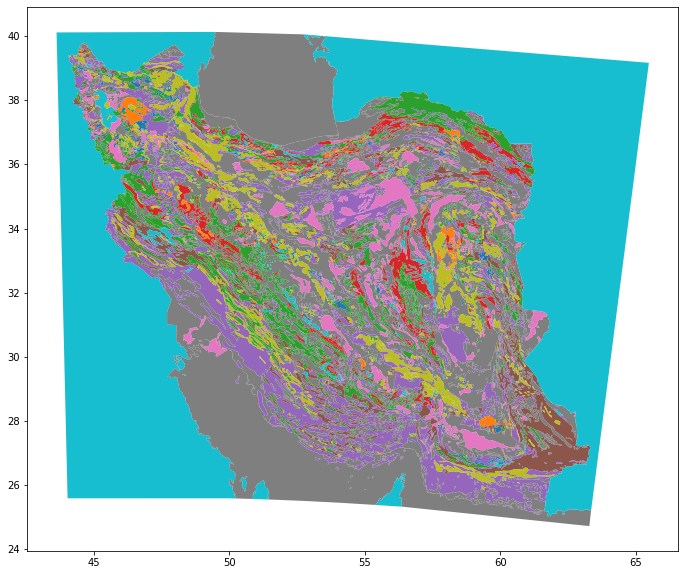

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
dat.plot(column="unit", ax=ax, legend=False)

In [25]:
dat = dat.loc[~dat.unit.isin(["Unknown", "Sea"])]

In [29]:
unit_areas = dat.groupby("unit").AREA.sum().sort_values(ascending=False)

In [27]:
import seaborn as sns


In [35]:
unit_areas[0:10]

unit
Quaternary                  49.688
Neogene                     25.602
Cretaceous                  13.391
Paleogene                   12.910
Tertiary Volcanics           8.702
Quaternanry sabkha/marsh     7.831
Tertiary                     4.429
Quaternary eolian            3.790
Jurassic                     3.758
Jurassic-Triassic            3.059
Name: AREA, dtype: float64

In [33]:
top_10 = unit_areas[0:10].keys()
dat_top10 = dat.loc[dat.unit.isin(top_10)]

In [ ]:
plt.barplot

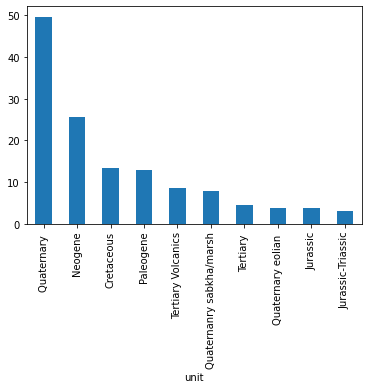

In [38]:
unit_areas[0:10].plot.bar()

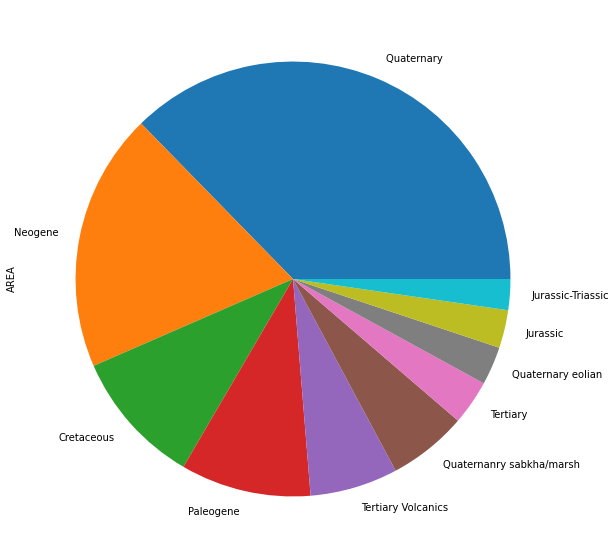

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
unit_areas[0:10].plot.pie(ax=ax)

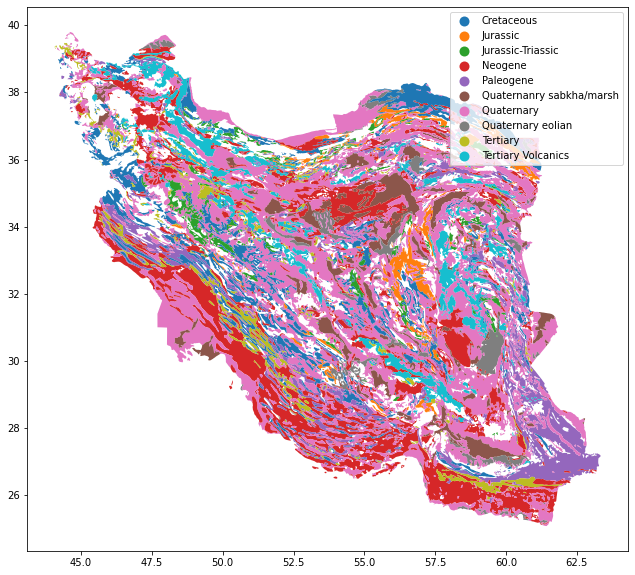

In [42]:
fig, ax = plt.subplots(figsize=(12,10))
dat_top10.plot(column="unit", ax=ax, legend=True)

In [43]:
dat_JT = dat.loc[dat.unit == "Jurassic-Triassic"]
dat_Ng = dat.loc[dat.unit == "Neogene"]

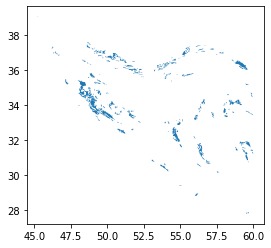

In [44]:
dat_JT.plot()

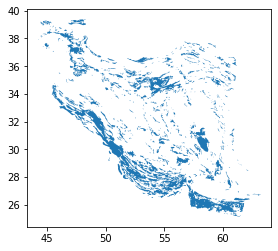

In [45]:
dat_Ng.plot()

In [53]:
import shapely

In [55]:
intbool = dat_JT.intersects(shapely.ops.unary_union(dat_Ng.geometry))
# see also overlay
# see also sjoin (Spatial join), see Tim's 2nd assignment notebook for Rtree requirement

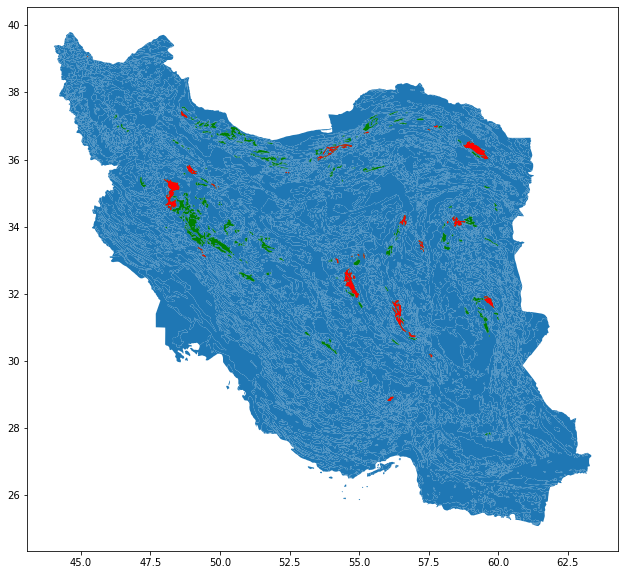

In [59]:
fig, ax = plt.subplots(figsize=(12,10))
dat.plot(ax=ax)
dat_JT.plot(color="green", ax=ax)
dat_JT.loc[intbool].plot(color="red", ax=ax)

# EO Data
Data from here:
https://apps.sentinel-hub.com/eo-browser

In [60]:
!wget 'https://github.com/ds4geo/ds4geo/blob/master/data/geospatial/EO_geology/EO_Browser_images%20(25).zip?raw=true'
!unzip 'EO_Browser_images (25).zip?raw=true' -d Sentinel2_im1


--2020-12-16 15:31:31--  https://github.com/ds4geo/ds4geo/blob/master/data/geospatial/EO_geology/EO_Browser_images%20(25).zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ds4geo/ds4geo/raw/master/data/geospatial/EO_geology/EO_Browser_images%20(25).zip [following]
--2020-12-16 15:31:32--  https://github.com/ds4geo/ds4geo/raw/master/data/geospatial/EO_geology/EO_Browser_images%20(25).zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/geospatial/EO_geology/EO_Browser_images%20(25).zip [following]
--2020-12-16 15:31:32--  https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/geospatial/EO_geology/EO_Browser_images%20(25).zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 

In [61]:
!ls

y
'EO_Browser_images (25).zip?raw=true'	  geo2cg.shp	   sample_data
'EO_Browser_images (25).zip?raw=true.1'   geo2cg.shp.xml   Sentinel2_im1
 geo2cg.dbf				  geo2cg.shx
 geo2cg.prj				  geo2cg.zip


In [62]:
import os

In [64]:
root = "Sentinel2_im1"
files = os.listdir(root)

In [65]:
files

['2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B11_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B8A_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B07_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B05_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B09_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B12_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B08_(Raw).tiff',
 '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B06_(Raw).tiff']

In [66]:
os.path.join(root,files[0])

'Sentinel2_im1/2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_B04_(Raw).tiff'

In [72]:
bands = ["B04", "B03", "B02"]
fnroot = '2019-12-31-00:00_2019-12-31-23:59_Sentinel-2_L2A_{}_(Raw).tiff'

dstack = []
for band in bands:
  with rio.open(os.path.join(root,fnroot.format(band)), "r") as source:
    dat = source.read()
    dstack.append(dat)

In [69]:
dat.shape

(1, 943, 1073)

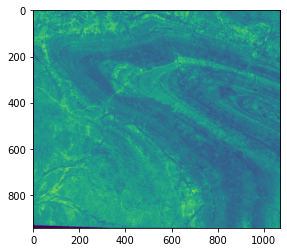

In [71]:
plt.imshow(dat[0])